# Setup env

In [1]:
%%capture
import sys
if sys.version_info >= (3, 8):
    print("Correct version of python installed.")
else:
    !sudo apt-get update -y
    !sudo apt-get install python3.9
    !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
    !sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2
    print("Env upgraded.")
    
try: 
    import itb
except:
    # Clone itb repository master branch and install all requirements and the library
    !git clone https://github.com/grafiszti/itb.git
    %cd /content/itb
    !pip3 install -r requirements.txt
    %cd /content

# Import Libs

In [2]:
%reload_ext autoreload
%autoreload 2

import os

from itb.img import (
    read, write, resize, 
    rgb2gray, gray2rgb, rgb2bgr, bgr2rgb,
    rotate90, rotate180, rotate270,
    merge
)
from itb.vis import draw, thumbnails
from itb.consts import TEST_IMG_1, TEST_IMG_2, TEST_IMG_3

# Image reading

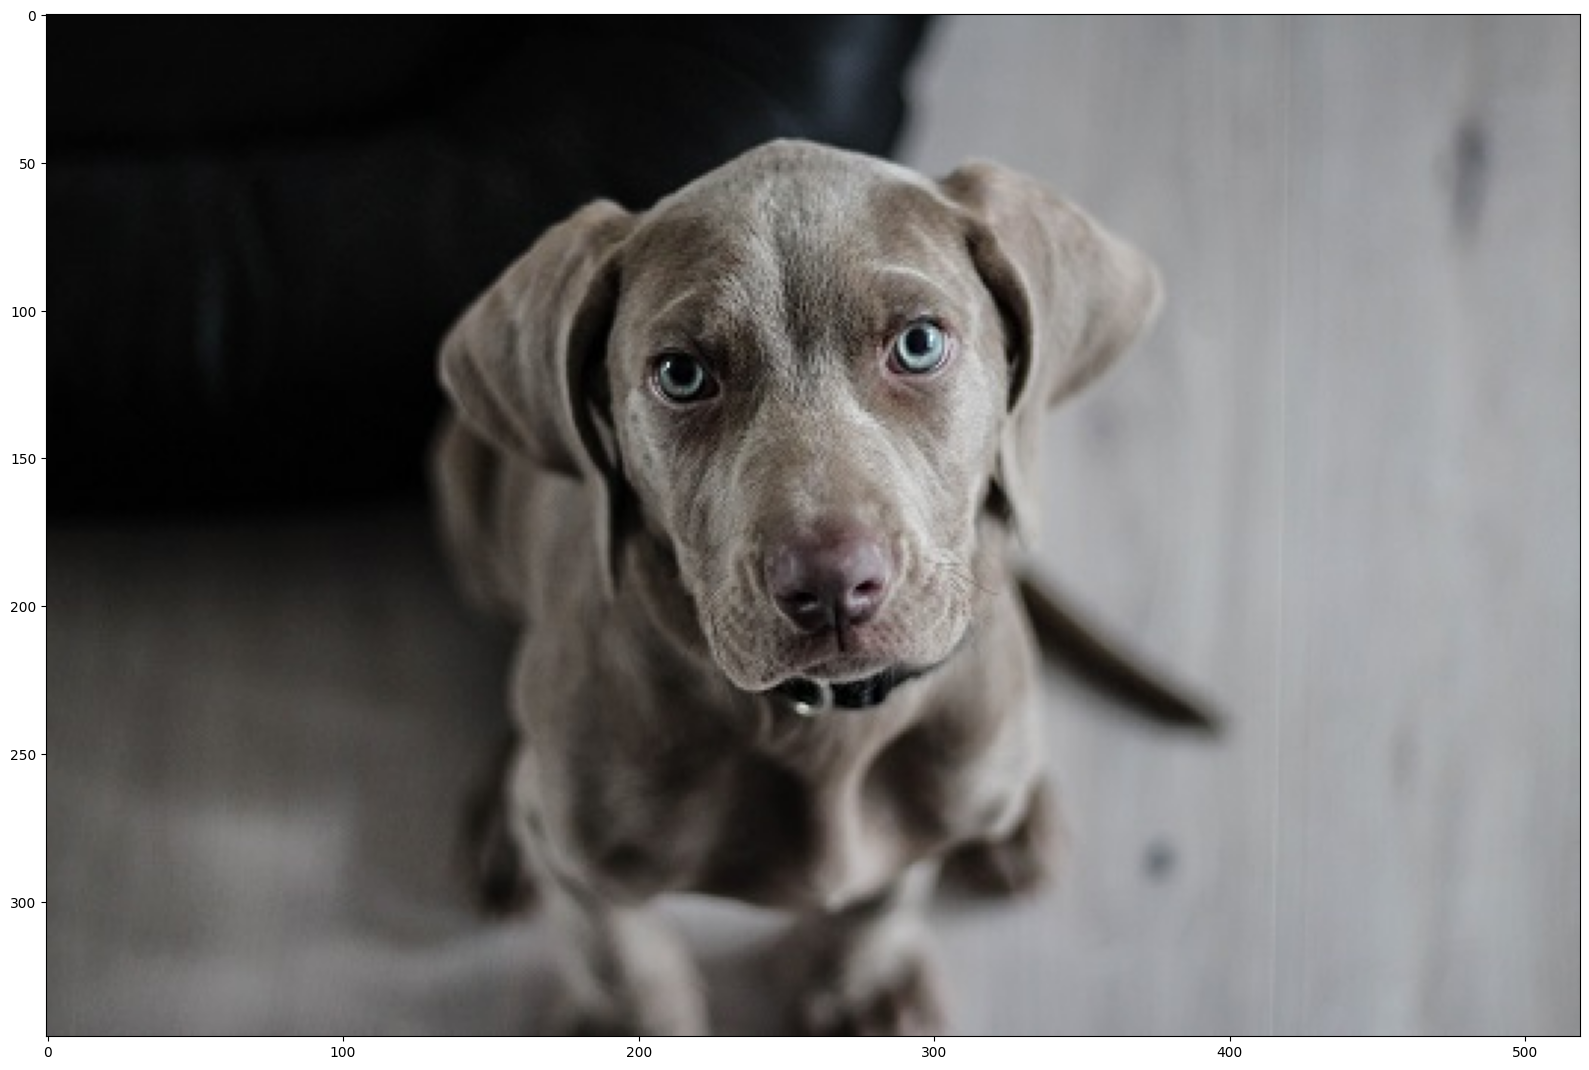

In [3]:
draw(read(TEST_IMG_1))

# Image writing

File test_image.png saved sucessfully.


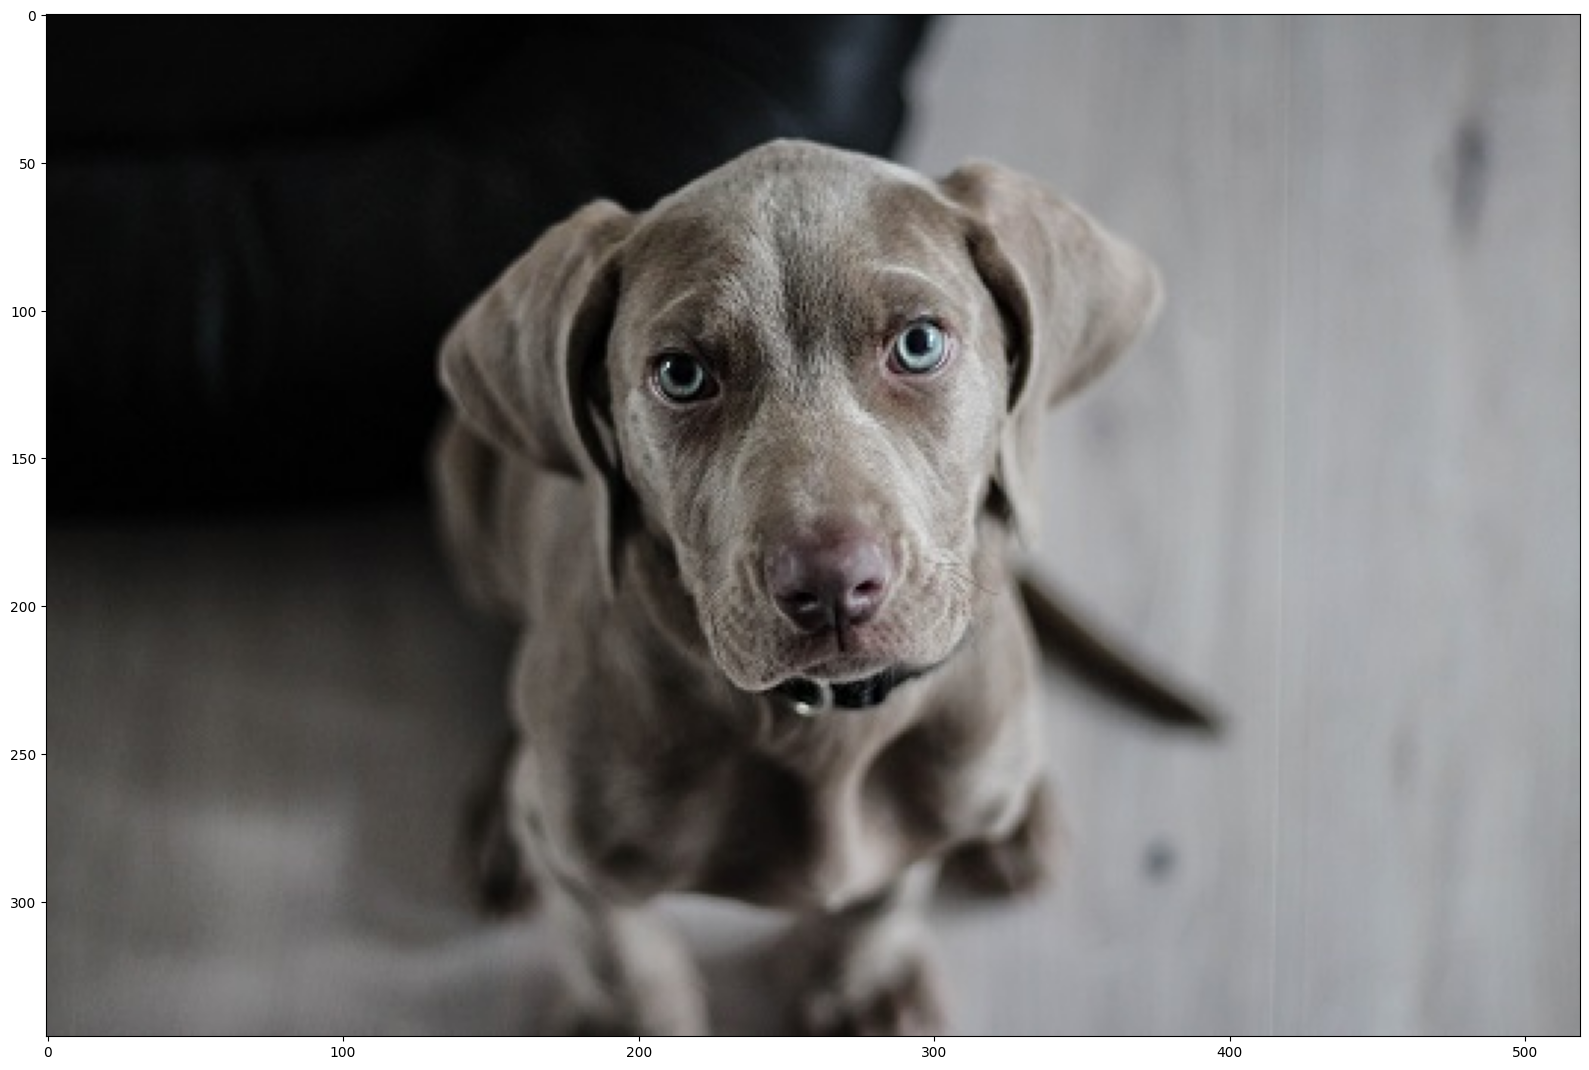

File test_image.png file successfully removed.


In [4]:
output_path = "test_image.png"

if write(output_path, read(TEST_IMG_1)):
    print(f"File {output_path} saved sucessfully.")
    draw(output_path)

# remove saved file
os.remove(output_path)
if not os.path.exists(output_path):
    print(f"File {output_path} file successfully removed.")

# Image resize

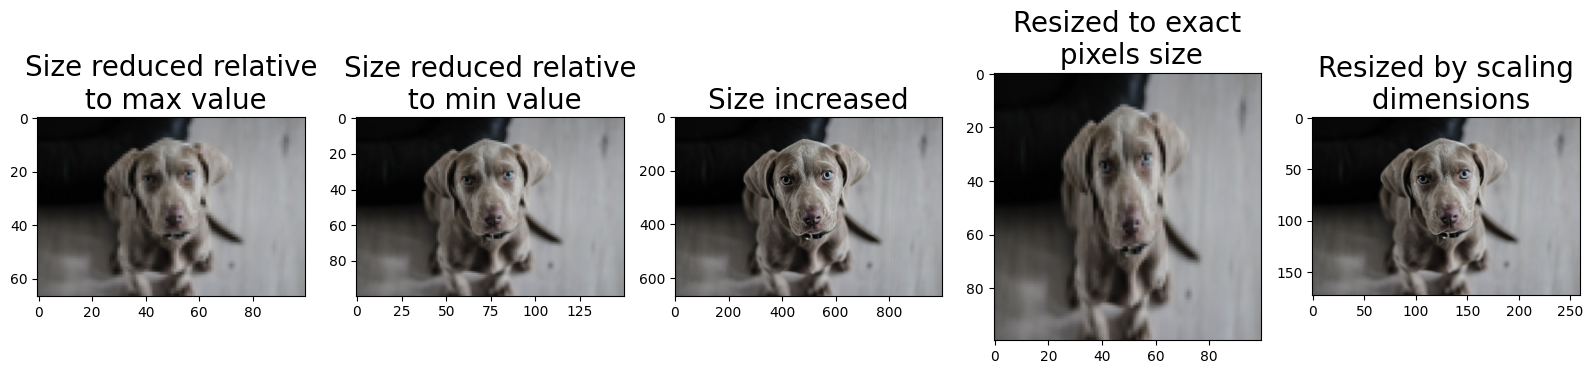

In [5]:
draw(
    [
        resize(read(TEST_IMG_1), 100), 
        resize(read(TEST_IMG_1), 100, "min"),
        resize(read(TEST_IMG_1), 1000),
        resize(read(TEST_IMG_1), (100, 100)),
        resize(read(TEST_IMG_1), (0.5, 0.5)),
    ],
    [
        "Size reduced relative\n to max value",
        "Size reduced relative\n to min value",
        "Size increased", 
        "Resized to exact\n pixels size", 
        "Resized by scaling\n dimensions"
    ],
    columns_number=5
)

# Changing color schemes

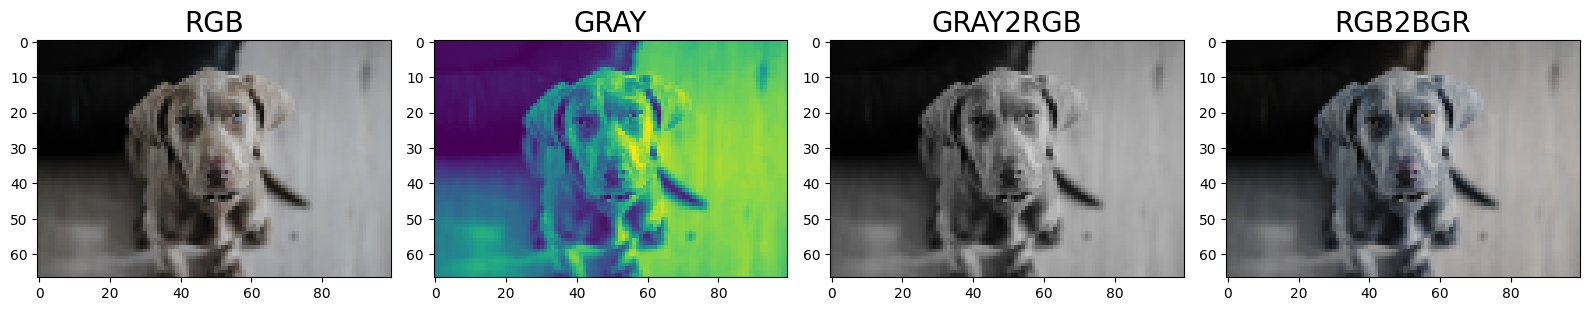

In [6]:
draw(
    thumbnails(
        [
            read(TEST_IMG_1), 
            rgb2gray(read(TEST_IMG_1)),
            gray2rgb(rgb2gray(read(TEST_IMG_1))),
            rgb2bgr(read(TEST_IMG_1))
        ]
    ),
    ["RGB", "GRAY", "GRAY2RGB", "RGB2BGR"]
)

# Thumbnails

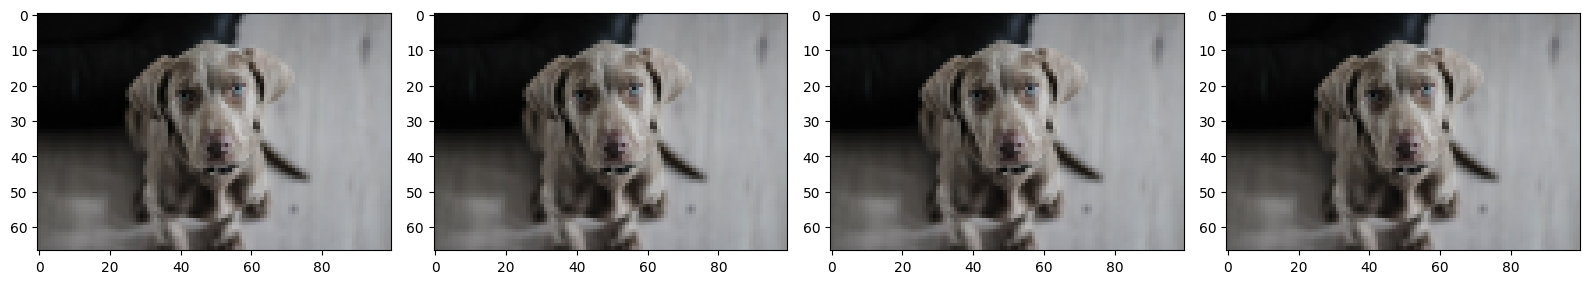

In [7]:
draw(
    # np.ndarray
    thumbnails(read(TEST_IMG_1)) 
    
    # str
    + thumbnails(TEST_IMG_1) 
    
    # combined list of str and np.ndarray
    + thumbnails([TEST_IMG_1, read(TEST_IMG_1)])
)

# Rotate the image

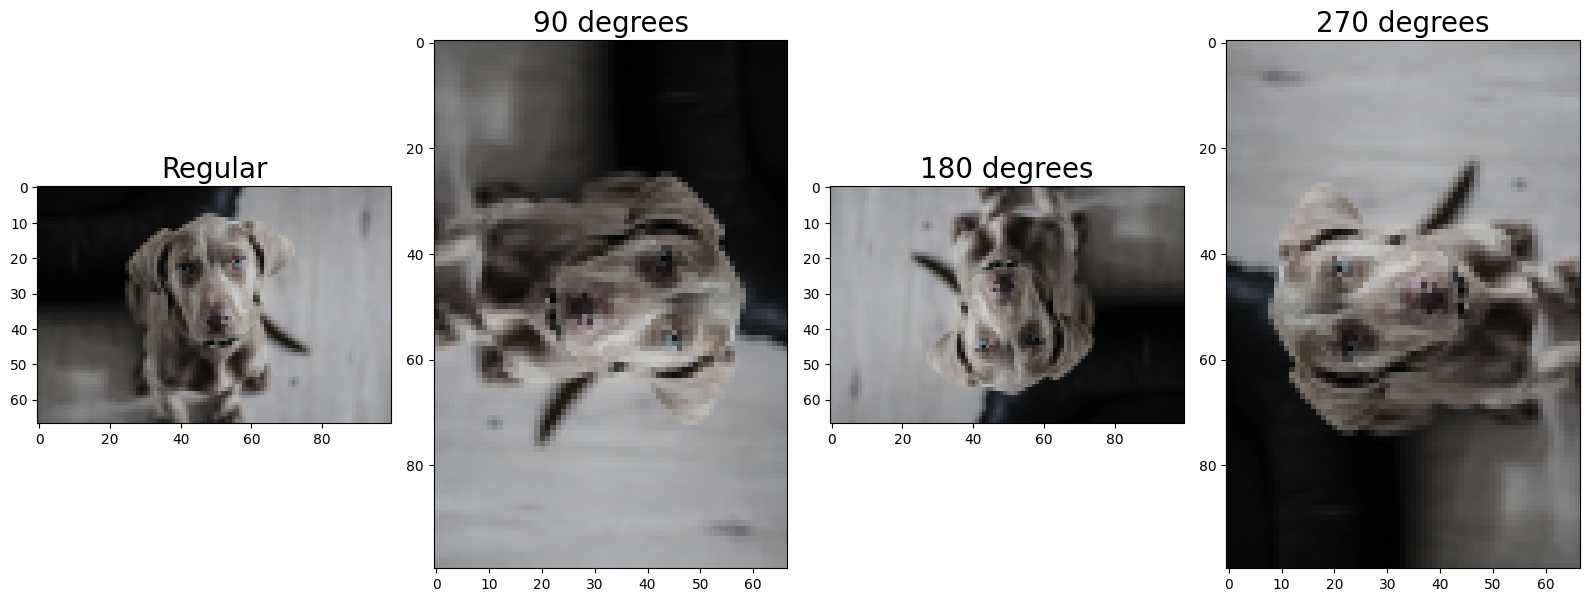

In [8]:
draw(
    thumbnails(
        [
            read(TEST_IMG_1),
            rotate90(read(TEST_IMG_1)),
            rotate180(read(TEST_IMG_1)),
            rotate270(read(TEST_IMG_1)),
        ]
    ),
    ["Regular", "90 degrees", "180 degrees", "270 degrees"]
)

# Merge two images

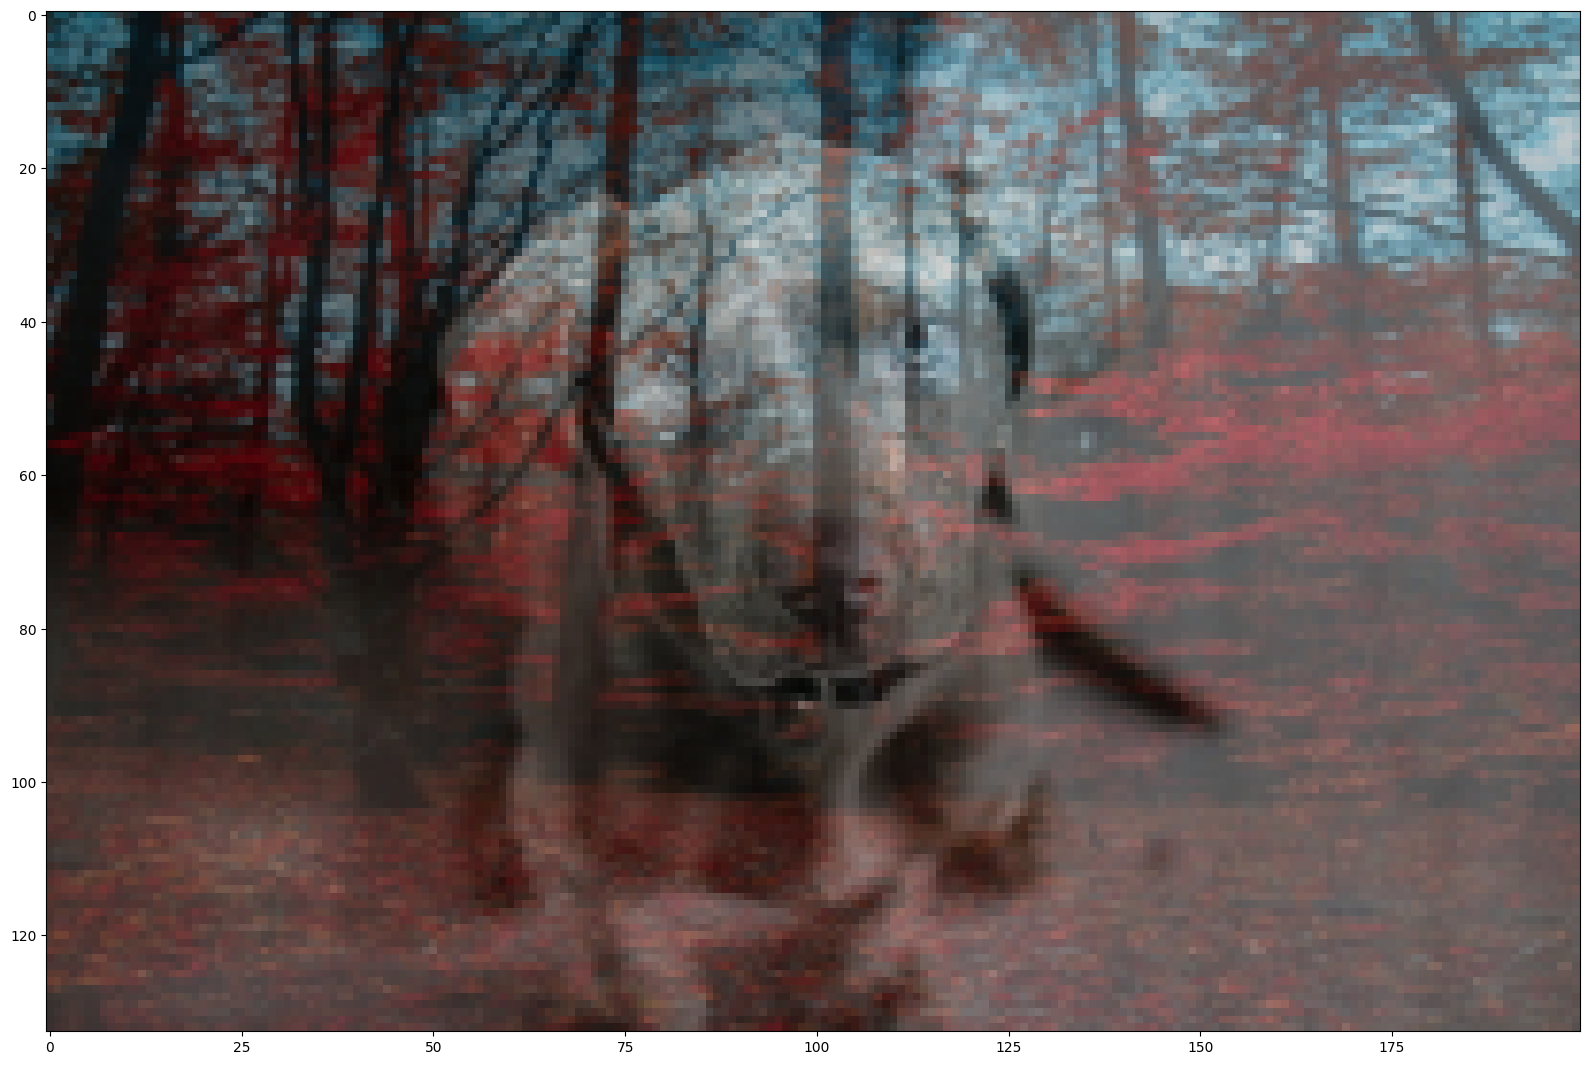

In [9]:
img1 = read(TEST_IMG_1)
img2 = resize(read(TEST_IMG_3), img1.shape[:2])
result = resize(merge(img1, img2), 200)

draw(result)